In [147]:
import pandas as pd

In [148]:
full_data = pd.read_csv('../src/train.csv')
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
age_pred_data_null = full_data[['Survived','Pclass','Sex','SibSp','Fare','Age']]
age_pred_data_null['Sex'] = [1 if gen == 'male' else 0 for gen in age_pred_data_null['Sex']]
age_pred_data = full_data[['Survived','Pclass','Sex','SibSp','Fare','Age']].dropna()
age_pred_data['Sex'] = [1 if gen == 'male' else 0 for gen in age_pred_data['Sex']]
X_age = age_pred_data[['Survived','Pclass','Sex','SibSp','Fare']]
y_age = age_pred_data['Age']

/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_age,y_age)
data_age_pred = age_pred_data_null[['Survived','Pclass','Sex','SibSp','Fare']]
age_pred = pd.DataFrame()
age_pred['Age'] = linreg.predict(data_age_pred)
full_data.Age.fillna(age_pred.Age,inplace=True)

In [151]:
useful_data = full_data[['Pclass','Sex','Age','Survived']]
useful_data['Age'] = useful_data['Age'].fillna(useful_data['Age'].mean()).astype('int')
useful_data['Sex'] = [1 if gen == 'male' else 0 for gen in useful_data['Sex']]
useful_data.head()

/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age,Survived
0,3,1,22,0
1,1,0,38,1
2,3,0,26,1
3,1,0,35,1
4,3,1,35,0


In [26]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
X = useful_data[['Pclass','Sex','Age']]
y = useful_data['Survived']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(clf2, X, y)
scores.mean()

0.80246913580246915

In [28]:
full_test_data = pd.read_csv('../src/test.csv')
full_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
test_age_pred_data_null = full_test_data[['Pclass','Sex','SibSp','Fare','Age']]
test_age_pred_data_null['Sex'] = [1 if gen == 'male' else 0 for gen in test_age_pred_data_null['Sex']]
test_age_pred_data = full_test_data[['Pclass','Sex','SibSp','Fare','Age']].dropna()
test_age_pred_data['Sex'] = [1 if gen == 'male' else 0 for gen in test_age_pred_data['Sex']]
X_test_age = test_age_pred_data[['Pclass','Sex','SibSp','Fare']]
y_test_age = test_age_pred_data['Age']

test_linreg = LinearRegression()
test_linreg.fit(X_test_age,y_test_age)
test_data_age_pred = test_age_pred_data[['Pclass','Sex','SibSp','Fare']]
test_age_pred = pd.DataFrame()
test_age_pred['Age'] = test_linreg.predict(test_data_age_pred)
full_test_data.Age.fillna(test_age_pred.Age,inplace=True)

/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [157]:
useful_test_data = full_test_data[['Pclass','Sex','Age']]
useful_test_data['Age'] = useful_test_data['Age'].fillna(useful_test_data['Age'].mean()).astype('int')
useful_test_data['Sex'] = [1 if gen == 'male' else 0 for gen in useful_test_data['Sex']]
useful_test_data.head()

/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/utkarshagarwal/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex,Age
0,3,1,34
1,3,0,47
2,2,1,62
3,3,1,27
4,3,0,22


In [159]:
full_test_data['Survived'] = clf.predict(useful_test_data)
pred_data = full_test_data[['PassengerId','Survived']]

In [160]:
pred_data.to_csv('../src/test_pred_tree.csv',index = False)

<Container object of 2 artists>

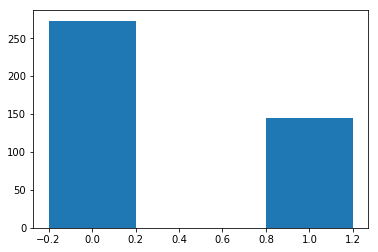

In [161]:
import matplotlib.pyplot as plt
bar_height = [sum(full_test_data['Survived'] == 1), sum(full_test_data['Survived'] == 0)]
width = 1/2.5
plt.bar([1,0],bar_height, width, align = 'center')

In [162]:
bar_height

[145, 273]

(array([  5.,   3.,   2.,   1.,   0.,   0.,   1.,   3.,   0.,   1.,   2.,
          2.,   0.,   2.,   1.,   2.,   0.,   3.,   3.,   1.,   0.,   3.,
          7.,  16.,   0.,   6.,   8.,  21.,  26.,   0.,  13.,  33.,  11.,
          0.,  13.,  13.,   8.,   0.,  10.,  37.,   7.,   0.,  15.,   7.,
          3.,   0.,   5.,  10.,   3.,   0.,   7.,  10.,  11.,   8.,   0.,
          9.,   4.,   1.,   0.,   9.,   3.,   5.,   0.,   5.,   3.,   5.,
          0.,   1.,   0.,   3.,   0.,   2.,   6.,   0.,   0.,   3.,   1.,
          1.,   4.,   0.,   2.,   1.,   2.,   0.,   3.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   0.76,   1.52,   2.28,   3.04,   3.8 ,   4.56,   5.32,
          6.08,   6.84,   7.6 ,   8.36,   9.12,   9.88,  10.64,  11.4 ,
         12.16,  12.92,  13.68,  14.44,  15.2 ,  15.96,  16.72,  17.48,
         18.24,  19.  ,  19.76,  20.52,  21.28,  22.04,  22.8 ,  23.56,
         24.32,  25.08,  25.84

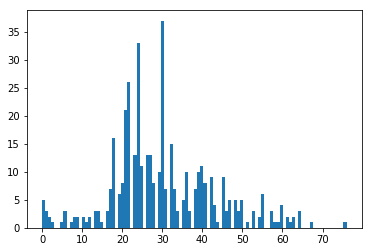

In [163]:
plt.hist(useful_test_data['Age'],100)